In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

In [2]:
df = pd.read_pickle('process1.pkl')
df

,职位,公司,地区,薪资,招聘描述,公司性质,公司规模,业务领域,要求,招聘关键词,要求关键词
1,游戏数据分析师（全球市场）,字节跳动,深圳,1.5-3万/月,本科,民营公司,10000人以上,"互联网/电子商务,计算机软件",NaN,"深圳,经验,本科,07,08,发布",
2,数据分析师（游戏）,哔哩哔哩,上海,1.5-2.5万/月,本科,上市公司,1000-5000人,互联网/电子商务,"['1.以用户增长为导向，对数据进行深度挖掘和分析，为提升增长关键指标提供落地性建议；', ...","上海,杨浦区,经验,本科,07,08,发布","用户,增长,导向,数据,进行,深度,挖掘,分析,提升,增长,关键,指标,提供,落地,建议,能..."
4,数据分析专家,饿了么,武汉,1.8-2.5万/月,本科,民营公司,10000人以上,互联网/电子商务,"['职责描述：', '1、负责管理数据分析团队，并做好日常管理工作；', '2、带领团队进行...","武汉,武汉,经济,开发区,经验,本科,07,08,发布","职责,描述,负责管理,数据分析,团队,做好,日常,管理工作,带领,团队,进行,数据,统计分析..."
5,数据分析师,三一重工重起事业部,长沙,1-1.5万/月,本科,民营公司,1000-5000人,机械/设备/重工,['岗位职责：'],"长沙,经验,本科,07,08,发布",岗位职责
7,数据分析师,捷孚凯市场咨询（中国）有限公司,上海,1.5-2万/月,本科,外资（欧美）,500-1000人,专业服务(咨询、人力资源、财会),"[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ...","上海,静安区,经验,本科,07,08,发布",
...,...,...,...,...,...,...,...,...,...,...,...
31030,网络搜索优化,江苏拍信云计算科技有限公司,无锡,6-8千/月,大专,民营公司,50-150人,计算机软件,"['岗位职责：', '1.负责网站推广、百度搜索优化工作；', '2.有针对性地开展推广活动...","无锡,滨湖区,经验,大专,07,07,发布","岗位职责,负责,网站,推广,百度,搜索,优化,工作,针对性,开展,推广,活动,提升,用户量,..."
31031,主播运营,济南金未来商贸有限公司,济南,4.5-6千/月,大专,民营公司,150-500人,互联网/电子商务,"['职责描述：', '1.性格开朗，好学，对数据敏感，有责任心，对淘宝、抖音平台略有了解，能...","济南,历城区,经验,大专,07,07,发布","职责,描述,性格开朗,好学,数据,敏感,责任心,淘宝,抖音,平台,略有,了解,公司,产品,推..."
31032,人事服务专员（FESCO派驻岗）,福州高扬信息科技有限公司,深圳,6-8千/月,大专,国企,150-500人,"多元化业务集团公司,外包服务","['世茂人事服务岗（FESCO派驻岗位）', '岗位目的：能够按照既定的世茂共享中心服务要求...","深圳,南山区,经验,大专,07,07,发布","世茂,人事,服务,FESCO,派驻,岗位,岗位,目的,能够,既定,世茂,共享,中心,服务,要..."
31033,培训督导,重庆爱肯拿贸易有限公司,重庆,7-9千/月,大专,创业公司,少于50人,批发/零售,['1、协助管理销售部工作，解决销售部日常问题，负责汇总及分析销售员工的数据分析，保证数据的...,"重庆,渝中区,经验,大专,07,07,发布","协助,管理,销售部,工作,解决,销售部,日常,问题,负责,汇总,分析,销售,员工,数据分析,..."


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 0.692 seconds.
Prefix dict has been built successfully.


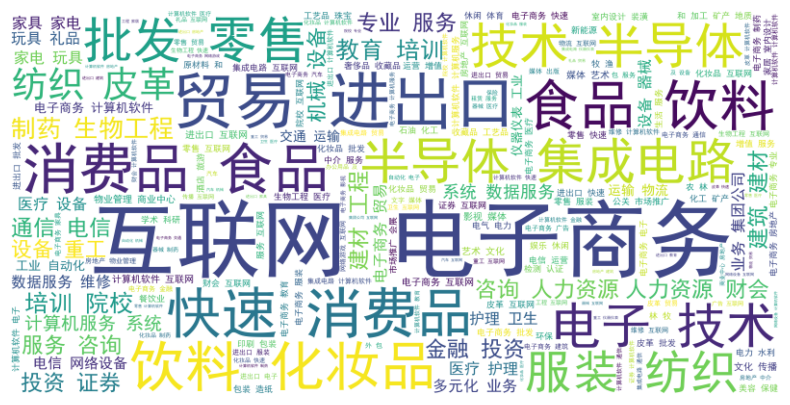

In [3]:
# 合并文本数据成一个字符串
all_text = ' '.join(df['业务领域'].tolist())

# 将文本按照 '/' 分隔符切分成词语
words_list = all_text.split('/')

# 将切分结果进行分词
words = []
for text in words_list:
    words.extend(jieba.cut(text))

# 将分词结果转换为空格分隔的字符串
word_cloud_text = ' '.join(words)

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='simhei.ttf').generate(word_cloud_text)

# 显示词云图像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
salary = df['薪资']
salary = pd.DataFrame(salary)

In [5]:
# 准备一个正则表达式模式用于匹配薪资信息
pattern = re.compile(r'(\d+(?:\.\d+)?)(?:-(\d+(?:\.\d+)?))?([^/]+/[年月天日小时]+)')


for index, row in salary.iterrows():
    # 从当前行的薪资列中提取信息
    match = pattern.match(row['薪资'])
    if match:
        # 如果匹配成功，提取最低薪资、最高薪资（如果没有则使用最低薪资）和单位
        salary.at[index, '最低薪资'] = match.group(1)  # 最低薪资
        salary.at[index, '最高薪资'] = match.group(2) if match.group(2) else match.group(1)  # 最高薪资
        salary.at[index, '单位'] = match.group(3)  # 单位
    else:
        # 如果没有匹配，可能需要设置一些默认值或进行错误处理
        # 这里我们简单地跳过没有匹配的行
        continue

# 打印结果或进一步处理
salary

,薪资,最低薪资,最高薪资,单位
1,1.5-3万/月,1.5,3,万/月
2,1.5-2.5万/月,1.5,2.5,万/月
4,1.8-2.5万/月,1.8,2.5,万/月
5,1-1.5万/月,1,1.5,万/月
7,1.5-2万/月,1.5,2,万/月
...,...,...,...,...
31030,6-8千/月,6,8,千/月
31031,4.5-6千/月,4.5,6,千/月
31032,6-8千/月,6,8,千/月
31033,7-9千/月,7,9,千/月


In [6]:
df.to_csv('send_data.csv')